In [1]:
import xarray as xr
import numpy as np
from filaments.plot import *
from filaments.processing import *

# Plot of filaments - South China Sea

## MODIS SST

In [2]:
path = "../../data/SCS/MODIS_INTERPOLATED_DATA/"
image_path = "../../immagini/SCS/"

In [3]:
chl_anomalies = xr.open_dataset(path + "MODIS_chl_anomalies_8D.nc")
temp_anomalies = xr.open_dataset(path + "MODIS_temp_anomalies_8D.nc")
bathy = xr.open_dataset(path + "bathymetry_interpolated.nc")

bathymetry_coast = bathy.where((bathy.elevation >= -1000)).elevation.to_numpy()

lons, lats = chl_anomalies.lon, chl_anomalies.lat

In [4]:
chl_anomalies

<xarray.Dataset>
Dimensions:      (time: 873, lat: 240, lon: 144)
Coordinates:
  * time         (time) datetime64[ns] 2003-01-01 2003-01-09 ... 2021-12-19
  * lat          (lat) float32 18.98 18.94 18.9 18.85 ... 9.104 9.062 9.021
  * lon          (lon) float32 108.0 108.1 108.1 108.1 ... 113.9 113.9 114.0
    day_of_year  (time) object ...
Data variables:
    chlor_a      (time, lat, lon) float32 ...

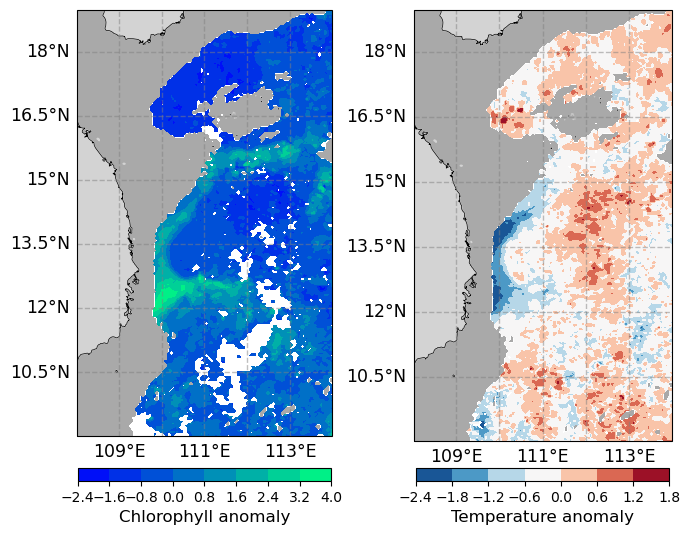

In [8]:
date = "2005-05-17"

fig, ax = set_plot(ncols = 2, figsize = [8,7])

ax = define_coast(ax, lons = lons, lats = lats, bath = bathymetry_coast)

chl = bathymetry_filter(chl_anomalies.sel(time = date).chlor_a, bathy)
temp = bathymetry_filter(temp_anomalies.sel(time = date).sst, bathy)

c = ax[0].contourf(lons, lats, chl, cmap = "winter")
cb = plt.colorbar(c, ax = ax[0], orientation = "horizontal", pad = 0.06, shrink = 0.9)
cb.set_label("Chlorophyll anomaly", fontsize = 12)


c = ax[1].contourf(lons, lats, temp, cmap = "RdBu_r")
cb = plt.colorbar(c, ax = ax[1], orientation = "horizontal", pad = 0.05, shrink = 0.9)
cb.set_label("Temperature anomaly", fontsize = 12)

plt.savefig(image_path + "17-05-2005_MODIS.png", bbox_inches = "tight")

## CMEMS

In [39]:
path = "../../data/SCS/"
image_path = "../../immagini/SCS/"

In [40]:
chl_anomalies = xr.open_dataset(path + "MODIS_chl_anomalies_8D.nc")
temp_anomalies = xr.open_dataset(path + "CMEMS_temp_anomalies_8D.nc")
bathy = xr.open_dataset(path + "bathymetry_interpolated.nc")

bathymetry_coast = bathy.where((bathy.elevation >= -1000)).elevation.to_numpy()

lons, lats = chl_anomalies.lon, chl_anomalies.lat

In [41]:
chl_anomalies

<xarray.Dataset>
Dimensions:      (time: 873, lon: 121, lat: 201)
Coordinates:
  * time         (time) datetime64[ns] 2003-01-01 2003-01-09 ... 2021-12-19
  * lon          (lon) float32 108.0 108.0 108.1 108.1 ... 113.9 113.9 114.0
  * lat          (lat) float32 9.025 9.075 9.125 9.175 ... 18.92 18.98 19.02
    day_of_year  (time) object ...
Data variables:
    chlor_a      (time, lat, lon) float32 ...

c:\Users\feder\miniconda3\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\feder\miniconda3\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


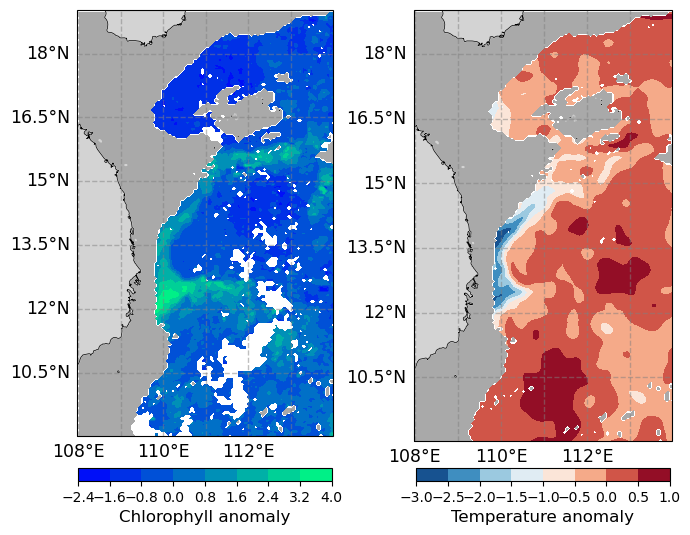

In [31]:
date = "2005-05-17"

fig, ax = set_plot(ncols = 2, figsize = [8,7])

ax = define_coast(ax, lons = lons, lats = lats, bath = bathymetry_coast)

chl = bathymetry_filter(chl_anomalies.sel(time = date).chlor_a, bathy)
temp = bathymetry_filter(temp_anomalies.sel(time = date).analysed_sst, bathy)

c = ax[0].contourf(lons, lats, chl, cmap = "winter")
cb = plt.colorbar(c, ax = ax[0], orientation = "horizontal", pad = 0.06, shrink = 0.9)
cb.set_label("Chlorophyll anomaly", fontsize = 12)


c = ax[1].contourf(lons, lats, temp, cmap = "RdBu_r")
cb = plt.colorbar(c, ax = ax[1], orientation = "horizontal", pad = 0.05, shrink = 0.9)
cb.set_label("Temperature anomaly", fontsize = 12)


plt.savefig(image_path + "17-05-2005_CMEMS.png", bbox_inches = "tight")

# Plot of dynamics - South China Sea